In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Successfull\n')

Successfull



# 1. Setup & Load the Data

In [22]:
df = pd.ExcelFile('/Users/ammohan/Documents/A.GIT/SAMPLE-SUPERSTORE/samplesuperstore.xls')

print(df.sheet_names)

['Orders', 'Returns', 'People']


In [46]:
Orders = pd.read_excel(df, sheet_name='Orders')
print('\norders_shape:', Orders.shape)
print('\norders_info:')
print(Orders.info())
print('\norders_describe:')
print(Orders.describe())
print('\norders_columns:')
print(Orders.columns)

Returns = pd.read_excel(df, sheet_name='Returns')
print('\nReturns_shape:', Returns.shape)
print('\nReturns_info:')
print(Returns.info())
print('\nReturns_describe:')
print(Returns.describe())
print('\nReturns_columns:')
print(Returns.columns)

People = pd.read_excel(df, sheet_name='People')
print('\nPeople_shape:', People.shape)
print('\nPeople_info:')
print(People.info())
print('\nPeople_describe:')
print(People.describe())
print('\nPeople_columns:')
print(People.columns)



orders_shape: (9994, 21)

orders_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   o

In [81]:
print(Orders.columns)
print(Returns.columns)
print(People.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit_Margin', 'Month'],
      dtype='object')
Index(['Returned', 'Order ID'], dtype='object')
Index(['Person', 'Region'], dtype='object')


# 2.Superstore Dataset – Data Dictionary

This dataset captures detailed information about customer orders, shipping, product categories, sales performance, returns, and the employees responsible for order fulfillment.

| **No.** | **Column Name**     | **Description** |
|--------:|---------------------|-----------------|
| 1  | **Row ID**          | A unique identifier for each row in the dataset. Used for indexing purposes. |
| 2  | **Order ID**        | Unique code representing each transaction/order placed by a customer. |
| 3  | **Order Date**      | The date on which the order was placed. Useful for time series and sales trend analysis. |
| 4  | **Ship Date**       | The date on which the order was shipped to the customer. |
| 5  | **Ship Mode**       | The type of delivery service used for shipping (e.g., Standard Class, Second Class, First Class, Same Day). |
| 6  | **Customer ID**     | Unique alphanumeric identifier assigned to each customer. |
| 7  | **Customer Name**   | Full name of the customer who placed the order. |
| 8  | **Segment**         | Market segment of the customer: **Consumer**, **Corporate**, or **Home Office**. |
| 9  | **Country**         | Country where the order was shipped. (In this dataset, typically "United States"). |
| 10 | **City**            | City where the customer is located. |
| 11 | **State**           | U.S. state where the customer resides. |
| 12 | **Postal Code**     | Zip or postal code of the customer's address. |
| 13 | **Region**          | One of four predefined regions: **West**, **East**, **Central**, or **South**. |
| 14 | **Product ID**      | Unique identifier for each product sold. |
| 15 | **Category**        | High-level classification of the product: **Furniture**, **Office Supplies**, or **Technology**. |
| 16 | **Sub-Category**    | More detailed classification within a Category (e.g., Chairs, Phones, Binders). |
| 17 | **Product Name**    | The full name or description of the product sold. |
| 18 | **Sales**           | Revenue generated from the sale (in USD). |
| 19 | **Quantity**        | Number of units sold for the product. |
| 20 | **Discount**        | Discount applied to the product (expressed as a decimal, e.g., 0.2 for 20%). |
| 21 | **Profit**          | Net profit earned from the transaction (in USD). |
| 22 | **Returned**        | Indicates whether an order was returned (typically marked as **Yes** or left blank). |
| 23 | **Person**          | Name of the employee or sales representative responsible for the order. Useful for performance analysis. |


# 3. Basic Info 

In [17]:
print('info',df.info())

print('describe',df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# 4. Sales & Profit Overview

In [55]:
# Total sales and profit
print("Total Sales:", Orders['Sales'].sum())
print("Total Profit:", Orders['Profit'].sum())

# Average profit margin
Orders['Profit_Margin'] = Orders['Profit'] / Orders['Sales']
print("Average Profit Margin:", Orders['Profit_Margin'].mean())


Total Sales: 2297200.8603000003
Total Profit: 286397.0216999999
Average Profit Margin: 0.12031392972104452


# 5.Sales & Profit by Category/Sub-Category

                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008


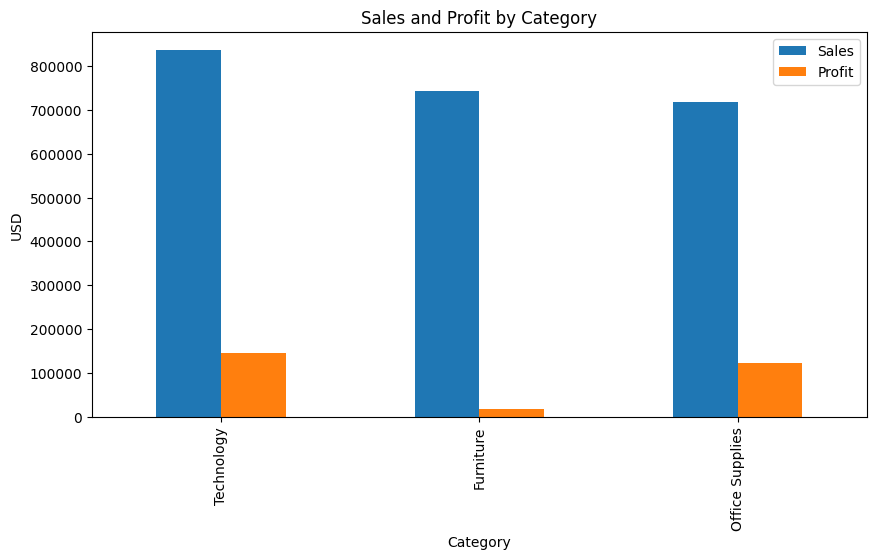

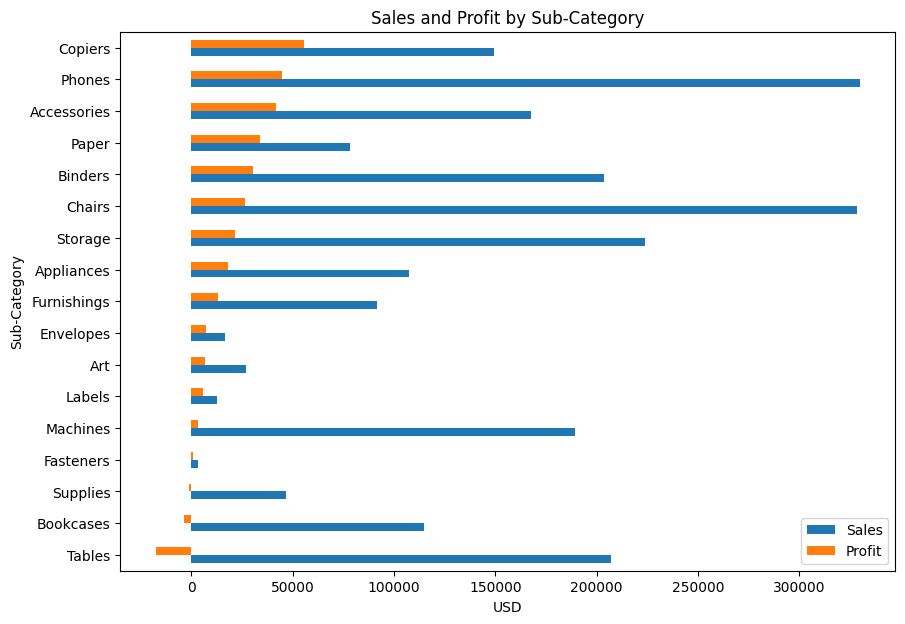

In [60]:
# Group by Category
df=Orders
category_perf = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print(category_perf)

# Plot
category_perf.plot(kind='bar', figsize=(10,5), title='Sales and Profit by Category')
plt.ylabel("USD")
plt.show()

# Sub-Category
subcat_perf = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Profit')
subcat_perf.plot(kind='barh', figsize=(10,7), title='Sales and Profit by Sub-Category')
plt.xlabel("USD")
plt.show()


# 6.Region-Wise Performance

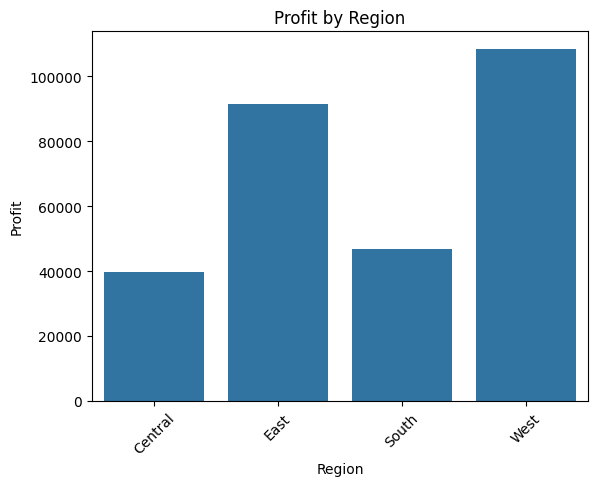

In [62]:
df=Orders
region_perf = df.groupby('Region')[['Sales', 'Profit']].sum()
sns.barplot(x=region_perf.index, y=region_perf['Profit'])
plt.title('Profit by Region')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()


# 7.Discount vs Profit Impact

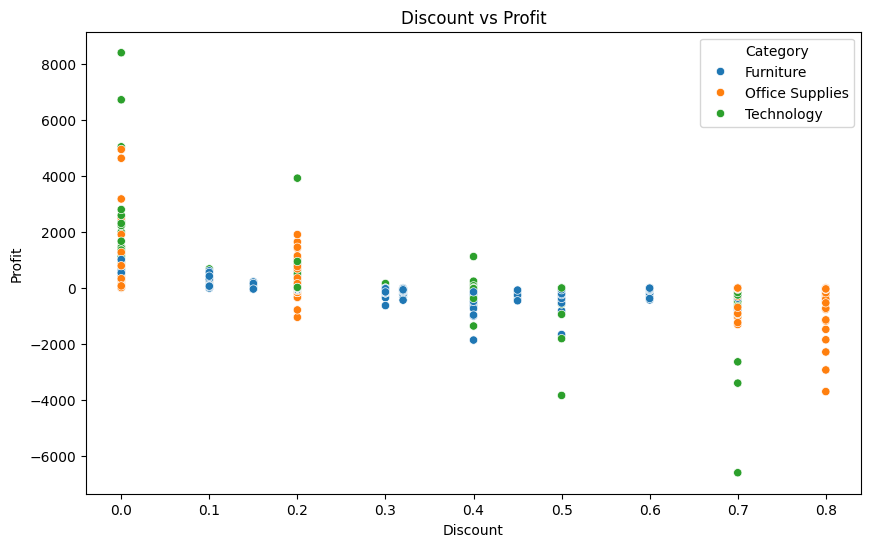

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit')
plt.show()


# 8.Top and Bottom Products

In [69]:
# Top 10 products by profit
df=Orders
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
print("Top Products:\n", top_products)

# Bottom 10 (possibly causing losses)
bottom_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)
print("Loss-Making Products:\n", bottom_products)


Top Products:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64
Loss-Making Products:
 Product Name
Cubify 

# 9.Monthly Sales Trend

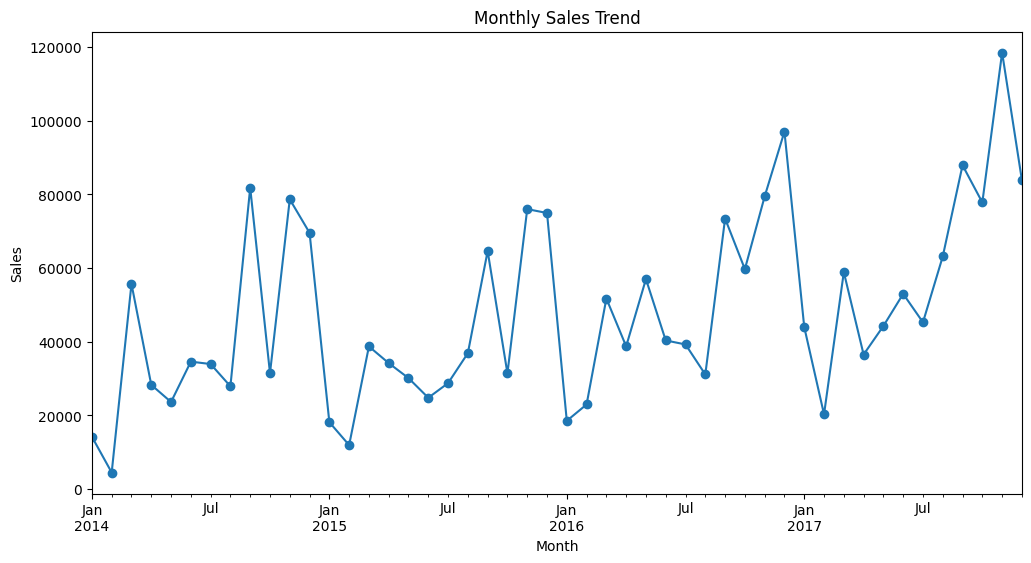

In [75]:
# Convert order date to datetime
df=Orders
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create Month-Year column
df['Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(12,6), marker='o', title='Monthly Sales Trend')
plt.ylabel("Sales")
plt.show()


# 10.Return Analysis

Returned Orders Count: 800


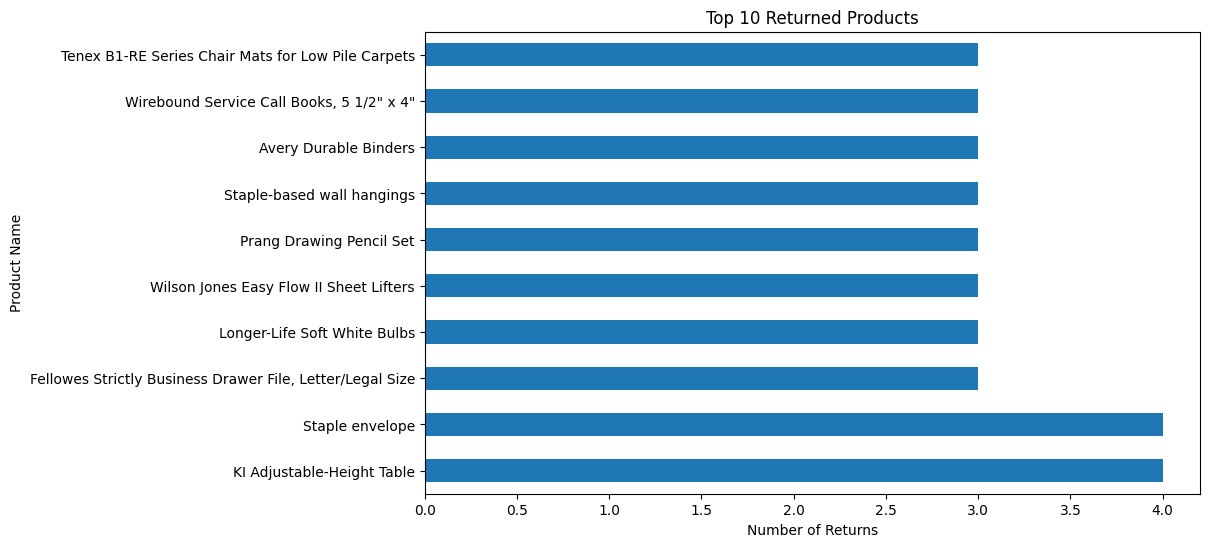

Losses due to returns:
 Category
Furniture           2341.1187
Office Supplies     6893.8960
Technology         13997.3468
Name: Profit, dtype: float64


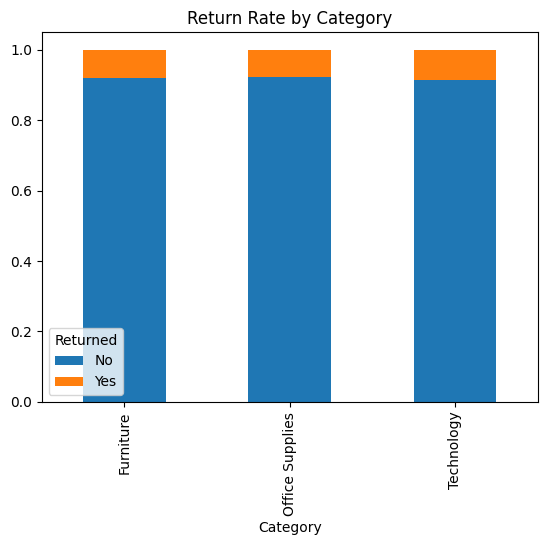

In [99]:
# Add a 'Returned' column to orders by checking if Order ID exists in returns
orders=Orders
returns=Returns
orders['Returned'] = orders['Order ID'].isin(returns['Order ID'])

# Optional: convert to 'Yes'/'No' format
orders['Returned'] = orders['Returned'].map({True: 'Yes', False: 'No'})

# Filter returned orders
returned = orders[orders['Returned'] == 'Yes']
print("Returned Orders Count:", returned.shape[0])

# Top 10 returned products
top_returns = returned['Product Name'].value_counts().head(10)

# Plot
top_returns.plot(kind='barh', title='Top 10 Returned Products', figsize=(10,6))
plt.xlabel('Number of Returns')
plt.show()

# Return Rate by Category
return_rate = orders.groupby('Category')['Returned'].value_counts(normalize=True).unstack()
return_rate.plot(kind='bar', stacked=True, title='Return Rate by Category')
plt.show

#Loss from Returns
returned = orders[orders['Returned'] == 'Yes']
loss_by_category = returned.groupby('Category')['Profit'].sum()
print("Losses due to returns:\n", loss_by_category)



In [83]:
print(Orders.columns)
print(Returns.columns)
print(People.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit_Margin', 'Month'],
      dtype='object')
Index(['Returned', 'Order ID'], dtype='object')
Index(['Person', 'Region'], dtype='object')


# What is the final profit considering returns, discounts, sales, and grouped by sub-category, category, segment, and region?